In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"/content/collegePlace.csv")

### **READ THE DATASET**

In [2]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


### **DATA PREPARATION--HANDLING MISSING VALUES**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [4]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

### **HANDLING OUTLIERS**

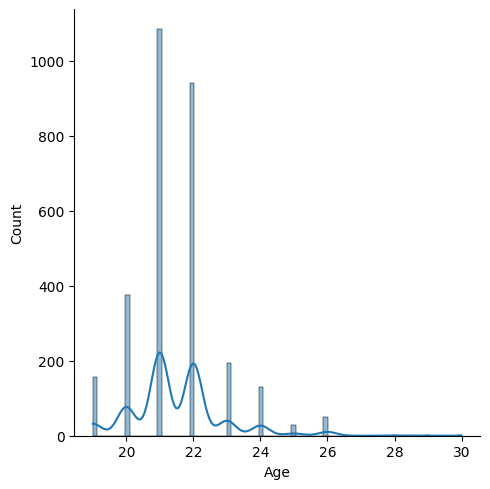

In [5]:
sns.displot(df['Age'], kde=True,)

### **HANDLING CATEOGORICAL VALUES**

In [6]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [7]:
df = df.drop(['Hostel'], axis=1)
df = df.replace(['Male'], [0])
df = df.replace(['Female'], [1])
df = df.replace(['Computer Science', 'Information Technology', 'Electronics And Communication','Mechanical', 'Electrical', 'Civil'], [0,1,2,3,4,5])

In [8]:
df.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,3,0,8,0,1


### **VISUAL ANALYSIS - UNIVARIATE ANALYSIS**

<Axes: xlabel='CGPA', ylabel='Density'>

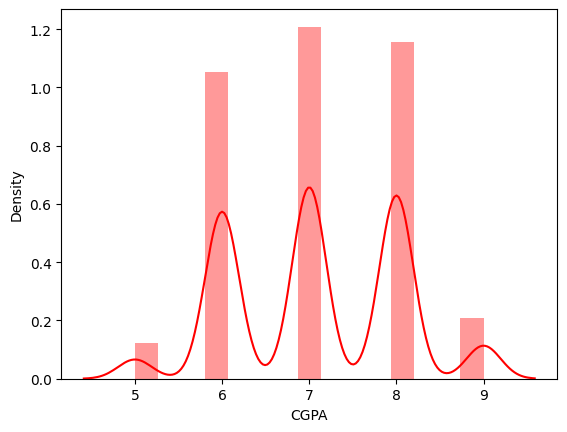

In [9]:
sns.distplot(df["CGPA"], color='r')

<Axes: xlabel='PlacedOrNot', ylabel='Density'>

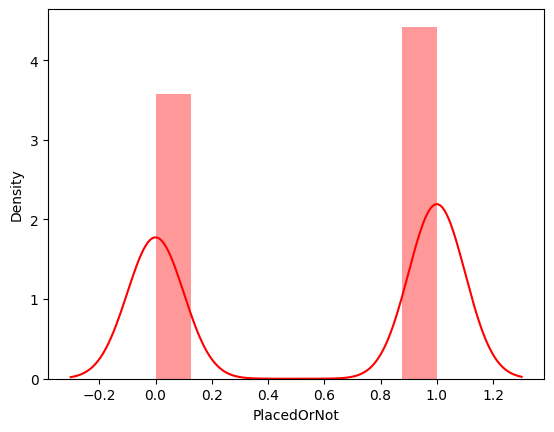

In [10]:
sns.distplot(df["PlacedOrNot"], color='r')

### **BIVARIATE ANALYSIS**

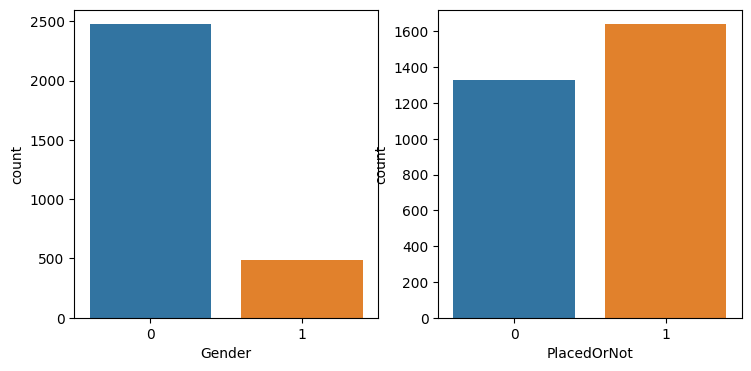

In [11]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(x=df['Gender'])
plt.subplot(1,4,2)
sns.countplot(x=df['PlacedOrNot'])

plt.show()

### **Multivariate analysis**

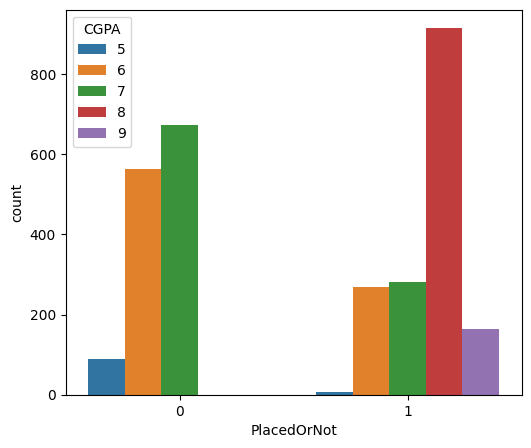

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x=df['PlacedOrNot'], hue=df['CGPA'])
plt.show()

<Axes: xlabel='PlacedOrNot', ylabel='CGPA'>

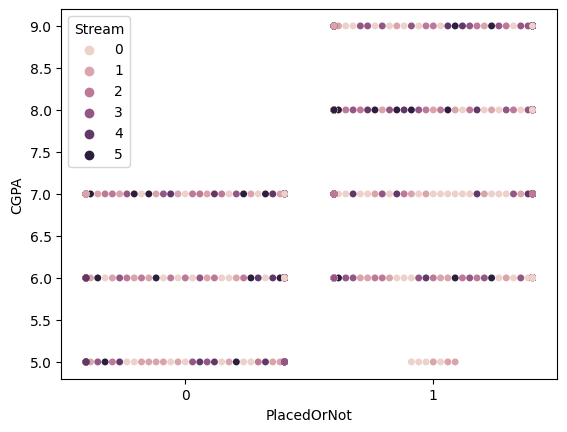

In [13]:
sns.swarmplot(x=df['PlacedOrNot'],y=df['CGPA'], hue=df['Stream'])

# **SCALING THE DATA**

In [14]:
Y=df['PlacedOrNot']
X=df.drop(['PlacedOrNot'],axis=1)

In [15]:
X

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,0,2,1,8,1
1,21,1,0,0,7,1
2,22,1,1,1,6,0
3,21,0,1,0,8,1
4,22,0,3,0,8,0
...,...,...,...,...,...,...
2961,23,0,1,0,7,0
2962,23,0,3,1,7,0
2963,22,0,1,1,7,0
2964,22,0,0,1,7,0


### **SPLITTING THE DATA INTO TRAIN AND TEST**

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, stratify=Y, random_state=2 )

## **SVM MODEL**

In [17]:
classifier = svm.SVC(kernel='linear')


In [18]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [19]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [20]:
print('Accuracy score of the training data:',training_data_accuracy)

Accuracy score of the training data: 0.7685497470489039


# **KNN MODEL**

In [21]:
best_k={"Regular":0}
best_score={"Regular":0}
for k in range(3,50,2):
  knn_temp= KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(X_train, Y_train)
  knn_temp_pred= knn_temp.predict(X_test)
  score = metrics.accuracy_score(Y_test, knn_temp_pred)*100
  if score >= best_score["Regular"] and score < 100:
    best_score["Regular"]=score
    best_k["Regular"]=k

In [22]:
print("---Result---\n: {}\nScore:{}".format(best_k,best_score))
knn= KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn.fit(X_train,Y_train)
knn_pred=knn.predict(X_test)
testd=accuracy_score(knn_pred,Y_test)

---Result---
: {'Regular': 21}
Score:{'Regular': 87.7104377104377}


# **ARTIFICAL NEURAL NETWORK MODEL**

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers

In [24]:
classifier = Sequential()

classifier.add(keras.layers.Dense(units=6,activation ='relu',input_dim=6))
classifier.add(keras.layers.Dropout(0.50))

classifier.add(keras.layers.Dense(units=6,activation ='relu'))
classifier.add(keras.layers.Dropout(0.50))

classifier.add(keras.layers.Dense(units=1,activation ='sigmoid'))

loss_1 = tf. keras.losses.BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss_1, metrics = ['accuracy'])

classifier.fit(X_train, Y_train, batch_size =20, epochs=100)

Epoch 1/100
119/119 [==============================] - 2s 3ms/step - loss: 3.1854 - accuracy: 0.5143
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 1.5348 - accuracy: 0.5097
Epoch 3/100
119/119 [==============================] - 0s 3ms/step - loss: 0.9182 - accuracy: 0.4996
Epoch 4/100
119/119 [==============================] - 0s 3ms/step - loss: 0.7561 - accuracy: 0.4933
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7076 - accuracy: 0.4928
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5105
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.5493
Epoch 8/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.5594
Epoch 9/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.5721
Epoch 10/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6482 - accura

In [25]:
import pickle

pickle.dump(knn,open("placement.pkl",'wb'))
model = pickle.load(open('placement.pkl','rb'))